### CEP 1   FEATURE ENGINEERING - HOUSING DATASET




In [68]:
# Import libraries

import math
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
# warnings.filterwarnings("ignore")


In [69]:
# import data
df = pd.read_csv('PEP1.csv')

### PERFORM FOLLOWING STEPS
## 1. UNDERSTAND THE DATASET
## A. IDENTIFY THE SHAPE OF DATASET

In [70]:
# Quick overview of size, number of variables and data types
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **OBSERVATIONS


- This dataset has 1460 observations (for each variables - rows) and 80 variables. Variables are numeric (38) and others are categorical (42).
- The dataset is 3.9MB in size which don't seem to be represent a problem for local computations.
- There are missing values in some columns

## 1. UNDERSTAND THE DATASET
## B. IDENTIFY THE VARIABLES WITH NULL VALUES

In [5]:
#Identify  variables with null values 
df.isnull().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

### **OBSERVATIONS
- The observation above show the percentage of null values in AScending order i.e. PoolQC has 99.5% values as null values whereas Sale Price has NO null values 



In [6]:
# Quick statistical overview of numerical data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1. UNDERSTAND THE DATASET
## c. IDENTIFY THE VARIABLES WITH UNIQUE VALUES - categorical values**

In [7]:
# Quick statistical overview of categorical variables
catcol=df.describe(include='O')
catcol

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## **Observations
### There are 43 cat variables:
- the 2nd row gives the number of "Unique" variables for EACH Categorical Variable. For e. for "Street" unique value = 2


In [9]:


df['Street'].nunique()

2

### ** BELOW SHOWS ARRAY OF ALL COLUMN FRAME WITH THEIR "UNIQUE" VALUE COUNT


In [10]:
catColumnNmaes = catcol
#catColumnNmaes = df.columns[1:]
#catColumnNmaes = df[['MSZoning','Street','Alley','LotShape']]
for var in catColumnNmaes:
    print('{}:{}'.format(var,df[var].nunique()))

MSZoning:5
Street:2
Alley:2
LotShape:4
LandContour:4
Utilities:2
LotConfig:5
LandSlope:3
Neighborhood:25
Condition1:9
Condition2:8
BldgType:5
HouseStyle:8
RoofStyle:6
RoofMatl:8
Exterior1st:15
Exterior2nd:16
MasVnrType:4
ExterQual:4
ExterCond:5
Foundation:6
BsmtQual:4
BsmtCond:4
BsmtExposure:4
BsmtFinType1:6
BsmtFinType2:6
Heating:6
HeatingQC:5
CentralAir:2
Electrical:5
KitchenQual:4
Functiol:7
FireplaceQu:5
GarageType:6
GarageFinish:3
GarageQual:5
GarageCond:5
PavedDrive:3
PoolQC:3
Fence:4
MiscFeature:4
SaleType:9
SaleCondition:6


## **Observations
- Number if Unique Values for Variable - MSZoning = 5 ...Cardinality
- FOr MSZoning, 'RL' has the MOST Observations (entries)

## 2. Generate a seperate Data set for Categorical and Numerical Variables
-  Dataset have already been generated above under 1b (numerical) and 1c (Cateogrical)
- The observation below shows numerical data set from original data frame

### **GENERATING NUMERICAL DATASET
###  38 Numerical Variables (columns) and 1460 Entires for each Variables (Rows)

In [11]:
# Example showing merging of two data frames
#catColumnNmaes = df[['MSSubClass','LotArea']]
# catColumnNmaes2 = df[['Alley','LotShape']]
# frames = [catColumnNmaes, catColumnNmaes2]
# catfin= pd.concat(frames)
# catfin

## **ONE WAY TO EXTRACT NUMERICAL DATASET

In [12]:

df_num = df.select_dtypes(exclude='object')
df_num


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## **ANOTHER WAY TO EXTRACT NUMERICAL DATASET

In [13]:



num_df = df[['Id','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',\
           'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
           'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd',\
            'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
            'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

print ("Numeric column in input DataFrame is:\n", num_df)

Numeric column in input DataFrame is:
         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  

In [14]:
num_df.count()

Id               1460
MSSubClass       1460
LotFrontage      1201
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1452
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchebvGr       1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1379
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
SalePrice        1460
dtype: int64

In [15]:
numColumns = num_df.columns
numColumns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
#cat_df = df[['Street', 'LotShape' , 'Utilities', 'Alley']]

#cat_df

In [17]:
# numerics = ['int16', 'int32', 'int64']
#df.select_dtypes(include = 'int16')
#df
# df.select_dtypes(include = numerics)
#num_df = df[['Id','MSSubClass', 'LotFrontage' , 'LotArea' , 'OverallQual']]
# num_df = df
# ** No need to define num_df values manually, as it can directly read numerical values fro original dataset

#num_df = df.describe()
#num_df

### ** Finding Categorical dataset from main set
### 43 categorical variables (columns) and 1460 entries for each variables (rows)

In [18]:
cat_df=df.drop(columns=num_df)


In [19]:
cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 3. EDA of numerical variables
## a. Missing Value Treatment


In [22]:
#using SK learn to replace missing values w/ mean values
numColumns = num_df.columns
from sklearn.impute import SimpleImputer
#numImpArray = SimpleImputer(strategy='mean').fit_transform(num_df)
numImpArray = SimpleImputer().fit_transform(num_df)

numImpDF = pd.DataFrame(numImpArray, columns=numColumns)
numImpDF

#using feature engine code below
#from feature_engine.imputation import MeanMedianImputer
# numImpDF = MeanMedianImputer().fit_transform(num_df)
# numImpDF


####from feature_engine.imputation import MeanMedianImputer
####num_imputer = MeanMedianImputer()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [23]:
numImpDF['LotFrontage'][7]

70.04995836802665

### Observation - Missing values REPLACED with MEAN values 
### For eg. 'Lot Frontage' ID: 8 values was originally missing and now shows 70.4 - mean value of that sepcific variable 

## **3B SKEWNESS AND DISTRIBUTION

### Skewness represents how far the mean value is from median value. Less skewed means normally distributed values. Below table gives absolute skewness of all numerical variables

In [24]:
# Absolute skewness for all numverical variables
abs(df.skew()).sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/2635035472.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  abs(df.skew()).sort_values(ascending=False)


MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchebvGr        4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
GarageYrBlt       0.649415
YearBuilt         0.613461
BsmtFullBath      0.596067
YearRemodAdd      0.503562
GarageCars        0.342549
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
I

In [25]:
# Skewness
df.skew().sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/4026502208.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=False)


MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchebvGr        4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [26]:
# Kurtosis
# very packed - high kurtosis
df.kurtosis().sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/3861843334.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis().sort_values(ascending=False)


MiscVal          701.003342
PoolArea         223.268499
LotArea          203.243271
3SsnPorch        123.662379
LowQualFinSF      83.234817
KitchebvGr        21.532404
BsmtFinSF2        20.113338
ScreenPorch       18.439068
LotFrontage       17.452867
BsmtHalfBath      16.396642
TotalBsmtSF       13.250483
BsmtFinSF1        11.118236
EnclosedPorch     10.430766
MasVnrArea        10.082417
OpenPorchSF        8.490336
SalePrice          6.536282
1stFlrSF           5.745841
GrLivArea          4.895121
WoodDeckSF         2.992951
BedroomAbvGr       2.230875
MSSubClass         1.580188
OverallCond        1.106413
GarageArea         0.917067
TotRmsAbvGrd       0.880762
BsmtUnfSF          0.474994
GarageCars         0.220998
OverallQual        0.096293
Fireplaces        -0.217237
MoSold            -0.404109
GarageYrBlt       -0.418341
YearBuilt         -0.439552
2ndFlrSF          -0.553464
BsmtFullBath      -0.839098
FullBath          -0.857043
HalfBath          -1.076927
YrSold            -1

### Mode

In [27]:
df.mode()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20.0,RL,60.0,7200.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,Gd,MnPrv,Shed,0.0,6.0,2009.0,WD,Normal,140000.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Median

In [28]:
df.median().sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/1556838569.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median().sort_values(ascending=False)


SalePrice        163000.0
LotArea            9478.5
YrSold             2008.0
YearRemodAdd       1994.0
GarageYrBlt        1980.0
YearBuilt          1973.0
GrLivArea          1464.0
1stFlrSF           1087.0
TotalBsmtSF         991.5
Id                  730.5
GarageArea          480.0
BsmtUnfSF           477.5
BsmtFinSF1          383.5
LotFrontage          69.0
MSSubClass           50.0
OpenPorchSF          25.0
TotRmsAbvGrd          6.0
MoSold                6.0
OverallQual           6.0
OverallCond           5.0
BedroomAbvGr          3.0
FullBath              2.0
GarageCars            2.0
Fireplaces            1.0
KitchebvGr            1.0
HalfBath              0.0
BsmtHalfBath          0.0
BsmtFullBath          0.0
WoodDeckSF            0.0
LowQualFinSF          0.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
2ndFlrSF              0.0
MasVnrArea            0.0
BsmtFinSF2            0.0
dtype: float

In [29]:
statistics.median(df['MSSubClass'])

50.0

In [30]:
df['MSSubClass'].median()

50.0

### Variance

In [31]:
df.var().sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/2312810960.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var().sort_values(ascending=False)


SalePrice        6.311111e+09
LotArea          9.962565e+07
GrLivArea        2.761296e+05
MiscVal          2.461381e+05
BsmtFinSF1       2.080255e+05
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
2ndFlrSF         1.905571e+05
Id               1.777550e+05
1stFlrSF         1.494501e+05
GarageArea       4.571251e+04
MasVnrArea       3.278497e+04
BsmtFinSF2       2.602391e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
ScreenPorch      3.108889e+03
LowQualFinSF     2.364204e+03
MSSubClass       1.789338e+03
PoolArea         1.614216e+03
YearBuilt        9.122154e+02
3SsnPorch        8.595059e+02
GarageYrBlt      6.095825e+02
LotFrontage      5.897492e+02
YearRemodAdd     4.262328e+02
MoSold           7.309595e+00
TotRmsAbvGrd     2.641903e+00
OverallQual      1.912679e+00
YrSold           1.763837e+00
OverallCond      1.238322e+00
BedroomAbvGr     6.654938e-01
GarageCars       5.584797e-01
Fireplaces       4.155947e-01
FullBath  

In [32]:
df['MSSubClass'].var()

1789.338306402389

In [33]:
statistics.variance(df['MSSubClass'])

1789.338306402396

### Std Dev

In [34]:
df.std().sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/939329188.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std().sort_values(ascending=False)


SalePrice        79442.502883
LotArea           9981.264932
GrLivArea          525.480383
MiscVal            496.123024
BsmtFinSF1         456.098091
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
2ndFlrSF           436.528436
Id                 421.610009
1stFlrSF           386.587738
GarageArea         213.804841
MasVnrArea         181.066207
BsmtFinSF2         161.319273
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
ScreenPorch         55.757415
LowQualFinSF        48.623081
MSSubClass          42.300571
PoolArea            40.177307
YearBuilt           30.202904
3SsnPorch           29.317331
GarageYrBlt         24.689725
LotFrontage         24.284752
YearRemodAdd        20.645407
MoSold               2.703626
TotRmsAbvGrd         1.625393
OverallQual          1.382997
YrSold               1.328095
OverallCond          1.112799
BedroomAbvGr         0.815778
GarageCars           0.747315
Fireplaces           0.644666
FullBath  

Variance gives a way to find aout how different are values to each other. Std Dev shows us how the variables differ from the mean

### Distributions
Applies apply to numerical variables

In [36]:
# skewness
df.skew().sort_values(ascending=False)

C:\Users\rtriv\AppData\Local\Temp/ipykernel_55204/3617338132.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=False)


MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchebvGr        4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

## **3d PAIR PLOT FOR DISTRIBUTION AND DENSITY

<AxesSubplot:ylabel='Density'>

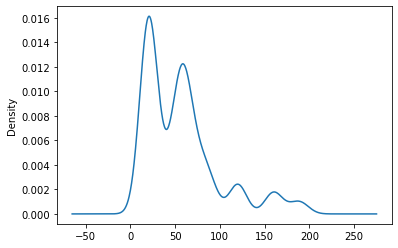

In [37]:
df['MSSubClass'].plot(kind='density')

### **OBSERVATION - VALUE POSITIVE - GRAPH SKEWED TOWARDS LEFT

<AxesSubplot:ylabel='Density'>

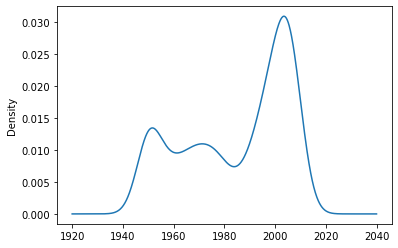

In [174]:
df['YearRemodAdd'].plot(kind='density')

### **OBSERVATION - VALUE NEGATIVE - GRAPH SKEWED TOWARDS RIGHT

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Density'>

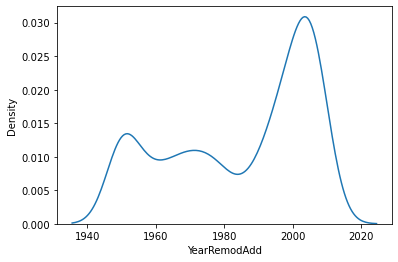

In [38]:
sns.kdeplot(x=df['YearRemodAdd'])

<AxesSubplot:ylabel='Density'>

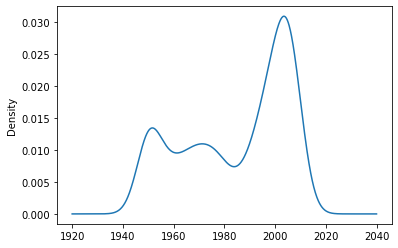

In [39]:
df['YearRemodAdd'].plot(kind='kde')

## **3c.	Identify significant variables using a correlation matrix 

<AxesSubplot:>

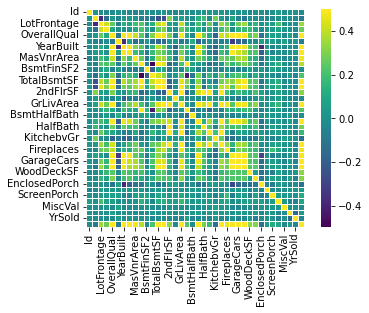

In [41]:
sns.heatmap(df.corr(),vmax=0.5, center=0, square=True, linewidths=1, annot=False, cmap='viridis')

## **Observations - In graph above, all points w/ dark blue and yellow color corresponding variables are w/ high corelation matrix
** Examples HIGH CORRELATION
- 2ndFlrSF & LotFrontage
- Yrsold & Fireplacers 
** Examples LOW CORRELATION
- EnclosedPorch & BsmtFinSF2
- KitechebvGr & ScreenPorch

<AxesSubplot:>

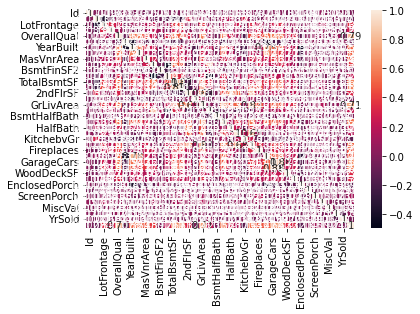

In [42]:
sns.heatmap(numImpDF.corr(), annot=True)

## ** Observation - above graph show corelation matrix only for numimpDF variables used in previous cases

## 4A EDA OF CATEGORICAL VARIABLES
## -MISSING VALUE TREATMENT

In [43]:
cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [44]:
catColumns = cat_df.columns
print(catColumns)
from sklearn.impute import SimpleImputer
catImpArray = SimpleImputer(strategy='constant',fill_value='Missing').fit_transform(cat_df)
catImpDF = pd.DataFrame(catImpArray, columns=catColumns)
catImpDF


# Categorical missing values will replace NaN with Missing
#from feature_engine.imputation import CategoricalImputer
#cat_imputer = CategoricalImputer(cat_df)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [45]:
catImpDF['LotShape'][7]

'IR1'

In [47]:
catImpDF['Alley'][2]

'Missing'

### **Observations -- All missing categorical variables REPLACED with word "MISSING"

### 4B COUNT PLOT FOR BIVARIATE ANALYSIS

### 1. CATEGORICAL VARIABLES
### VARIABLE - LotConfig

<AxesSubplot:xlabel='count', ylabel='LotConfig'>

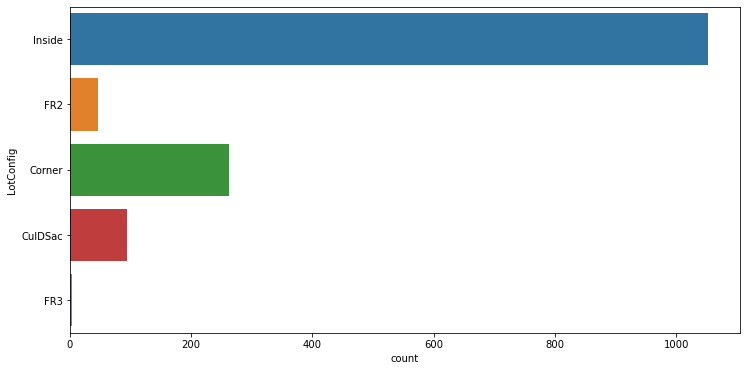

In [48]:
plt.figure(figsize=(12,6))

sns.countplot(y='LotConfig', data=catImpDF)

<AxesSubplot:xlabel='count', ylabel='MSZoning'>

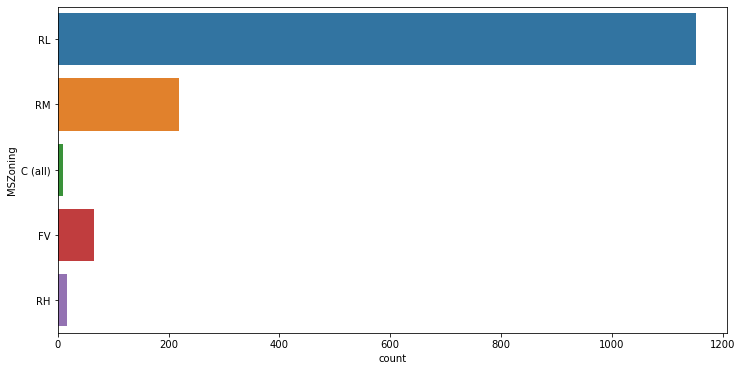

In [49]:
plt.figure(figsize=(12,6))

sns.countplot(y='MSZoning', data=catImpDF)

### Observation -- shows the missing value for variable "Alley" replaced with the word "MISSING" in row 3

### 2. NUMERICAL VARIABLES

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


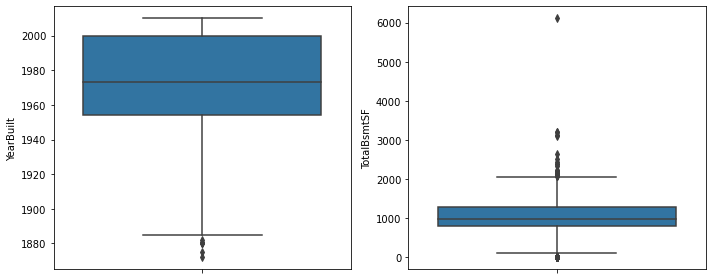

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


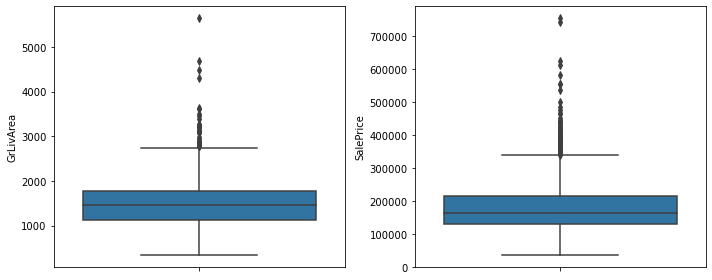

In [51]:
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']

facet = None

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = numImpDF)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = numImpDF)
        plt.tight_layout()
        plt.show()

### Observation -- above graphs show box plots for 4 differnt numerical variables. For example it is visible that
### for vairable 'TotalBsmtSF', one value > 6000, is clearly an "Outlier". Box plot clearly shows the apprximate min (0) , max ### (2000) , median (1000) and outlier value (6000) for variable 'TotalBsmtSF'.

## **5. COMBINE ALL SIGNIFICANT CATEGORICAL AND NUMERICAL VALUES


## **DROPPING INSIGNIFICANT CAT COLUMNS W/ NULL > 90%  - 3 CASES POOLQC, ALLEY, MISCFEATURE

In [52]:


#catImpDF_sig = catImpDF.drop(['PoolQC'],['MiscFeature'],['Alley'])
catImpDF_sig42 = catImpDF.drop(['PoolQC'],axis=1)
catImpDF_sig41 = catImpDF_sig42.drop(['MiscFeature'],axis=1)
catImpDF_sig40 = catImpDF_sig41.drop(['Alley'],axis=1)
catImpDF_sig40

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,WD,Normal


In [53]:
frames = [numImpDF, catImpDF]
#catfin= pd.concat(frames)
catfin = numImpDF.join(catImpDF_sig40, how='outer')
catfin

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,WD,Normal


### 6 PLOTTING BOX PLOT FOR NEW DATASET TO FIND VARIABLES WITH OUTLIERS
###  OBSERVATION 1

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

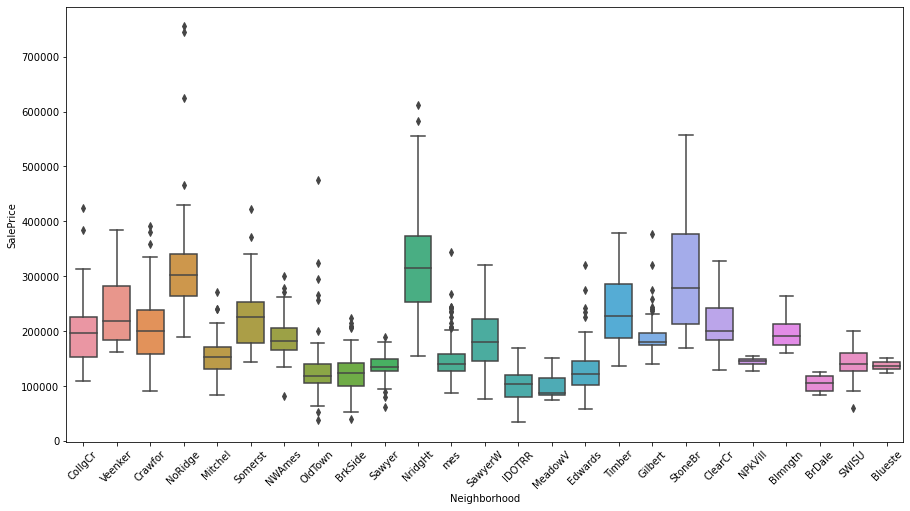

In [54]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice',  data=catfin)

### **Observation -  We can conclude that the distribution of SalePrice changes with the individual neighborhoods and can be a good predictor for it. We can observe some Outliers in Sale Prices for Negihbourhood such as Niridge,  mes, Gilbert etc.

### OBSERVATION 2

In [55]:
df.shape


(1460, 81)

In [56]:
numImpDF

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [57]:
catfin



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,WD,Normal


## 4C SIGNIFICANT VARIABLES USING P TEST

### Hypothesis testing
- **Null:** initial assumption about an event (ground truth)
- **Alternate:** counters null

p-value is the measure of something happening at random and ranges from 0-1 (acceptable value is significance level =<5%)

The smaller your p-value the more you can trust your initial assumptions (null hypothesis)

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

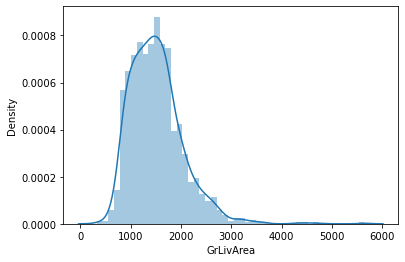

In [58]:
sns.distplot(df['GrLivArea'])

### T-Test
Used to compare the means of 2 groups. Commonly used to find out if a variable has an impact in a specific population or if 2 groups are different to each other

In [59]:
import researchpy as rp

In [60]:
 ttestResults =rp.ttest(group1 =catfin['GrLivArea'][catfin['MSZoning']=='RL'], group1_name='RL',
                        group2 =catfin['GrLivArea'][catfin['MSZoning']=='RM'], group2_name='RM')

In [61]:
ttestResults

(   Variable       N         Mean          SD         SE    95% Conf.  \
 0        RL  1151.0  1551.645526  530.817525  15.646154  1520.947319   
 1        RM   218.0  1322.073394  488.784691  33.104676  1256.825524   
 2  combined  1369.0  1515.088386  530.871286  14.347873  1486.942170   
 
       Interval  
 0  1582.343732  
 1  1387.321265  
 2  1543.234602  ,
           Independent t-test    results
 0    Difference (RL - RM) =    229.5721
 1      Degrees of freedom =   1367.0000
 2                       t =      5.9271
 3   Two side test p value =      0.0000
 4  Difference < 0 p value =      1.0000
 5  Difference > 0 p value =      0.0000
 6               Cohen's d =      0.4378
 7               Hedge's g =      0.4376
 8           Glass's delta =      0.4325
 9             Pearson's r =      0.1583)

## ** Observations
### t = 5.927% difference between p values of RL and RM from MSZoning
###  Difference <0 = 1.0
### Difference >0 = 0
###  Pearson corelation = 0.1583 --corelation between RL and RM from MSZoning 
### Test shows RL and RM values are 15.8% correlated

In [62]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(numImpDF)
chi_square_value, p_value


C:\Users\rtriv\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:111: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

### Chisquare test to compare MSsubclass and LotFrontage

In [63]:
var1= np.array((catfin['MSSubClass'],catfin['LotFrontage'])).T
print(var1.shape)

(1460, 2)


In [64]:
import scipy.stats as stats
val = stats.chi2_contingency(var1)
expected_values = val[3]
num_rows = expected_values.shape[0]
num_cols = expected_values.shape[1]
ddof = (num_rows-1)*(num_cols-1)
chi_square = sum([(o-e)**2./e for o,e in zip(var1,expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print(chi_square_statistic)

30296.781848939587


In [65]:
from scipy.stats import chi2
p_value = 1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('P-value = {}'.format(p_value))

P-value = 0.0


C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='MSZoning'>

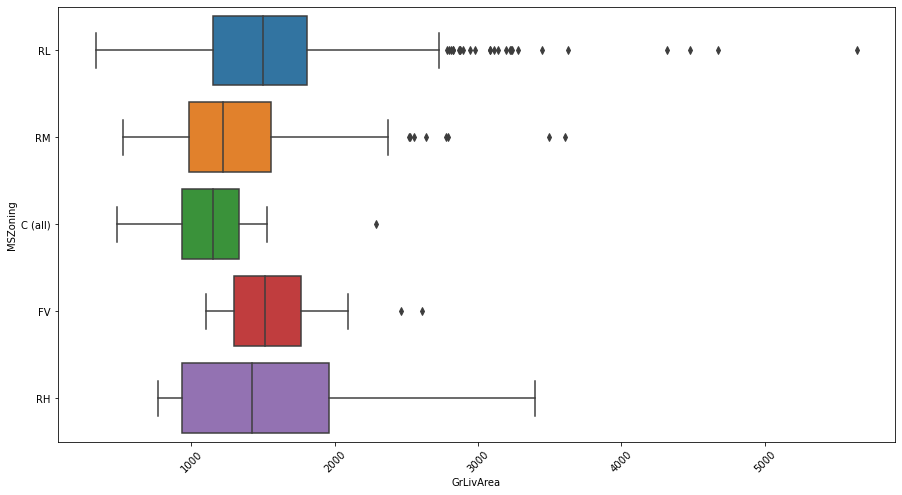

In [66]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('GrLivArea', 'MSZoning',  data=catfin)

In [67]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, 